# Model

In [13]:
import recommender as rec
import importlib
importlib.reload(rec)

<module 'recommender' from '/Users/merve/Library/CloudStorage/OneDrive-Persönlich/FH TW/2. Semester/SOE-Python/spotify/spotify/recommender.py'>

In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

In [40]:
#In Preprocessing we did already the following steps:
rec.main2()

df_artists_tracks = rec.get_artists_tracks()

In [14]:
pd.set_option('display.max_columns', None)
df_artists_tracks.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence,artist_popularity,followers,genres,tracks_id,tracks_name,artists_id,artists_name,album_id,uri,preview_url,country,lyrics,metric_cluster,genres_new,genre_cluster
0,0.294,0.698,235584.0,0.606,0.000003,10.0,0.151,-7.447,0.0,28.0,0.0262,115.018,4.0,0.622,28,425,['finnish indie'],5qljLQuKnNJf4F4vfxQB0V,Blood,3mxJuHRn2ZWD5OofvJtDZY,Jesse Markin,0D3QufeCudpQANOR7luqdr,spotify:track:5qljLQuKnNJf4F4vfxQB0V,https://p.scdn.co/mp3-preview/1b05a902da3a251d...,BE,\r\n\r\nPerhaps I am bound to be restless\r\nA...,0,finnish indie,44.0
1,0.166,0.543,233998.0,0.612,0.000000,9.0,0.129,-7.685,0.0,37.0,0.0487,139.876,3.0,0.463,28,425,['finnish indie'],3THTkAwJOsmxgizvYkBNRI,Jericho,3mxJuHRn2ZWD5OofvJtDZY,Jesse Markin,3wIjGVauUxR4c3NvnQZ0Jo,spotify:track:3THTkAwJOsmxgizvYkBNRI,https://p.scdn.co/mp3-preview/8af517b8202114d6...,AR,\r\n\r\nMuch better in my day\r\nMuch better i...,0,finnish indie,44.0
2,0.863,0.719,656960.0,0.308,0.000000,6.0,0.253,-10.340,1.0,31.0,0.9220,115.075,3.0,0.589,36,2965,[],3VAX2MJdmdqARLSU5hPMpm,The Ugly Duckling,4xWMewm6CYMstu0sPgd9jJ,Favorite Kids Stories,1bcqsH5UyTBzmh9YizdsBE,spotify:track:3VAX2MJdmdqARLSU5hPMpm,https://p.scdn.co/mp3-preview/d8140736a6131cb5...,BE,\r\nYour Gods and my Gods-do you or I know whi...,1,,-1.0
3,0.824,0.688,29240.0,0.304,0.000000,10.0,0.142,-9.960,1.0,0.0,0.5310,77.056,3.0,0.414,36,2965,[],1WJzRtI1ABzV3TPIeJZVvi,Three Blind Mice,4xWMewm6CYMstu0sPgd9jJ,Favorite Kids Stories,51g5viCaYjOW5XO4qX1RCD,spotify:track:1WJzRtI1ABzV3TPIeJZVvi,https://p.scdn.co/mp3-preview/54031f6d3ab4784a...,BE,\r\nYour Gods and my Gods-do you or I know whi...,1,,-1.0
4,0.850,0.632,497493.0,0.372,0.000000,7.0,0.110,-8.760,1.0,30.0,0.9350,84.486,4.0,0.611,36,2965,[],65MopnhsXOgYw4RuiA2pGU,The Three Billy Goats Gruff,4xWMewm6CYMstu0sPgd9jJ,Favorite Kids Stories,7EtGJVYZbb2Krgwizn2flB,spotify:track:65MopnhsXOgYw4RuiA2pGU,https://p.scdn.co/mp3-preview/32c98e55e89da792...,BE,\r\nYour Gods and my Gods-do you or I know whi...,1,,-1.0


## Build Genre recommondation

### Verwendetes Modell

In [41]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words=stopwords.words('english')
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    text = re.sub(r'\[|\]|\'|,', '', text)    
    text = text.lower()
    text = text.replace('hip hop', 'hip-hop')
    text = text.replace('r&b', 'r-n-b')
    text = text.replace('death metal', 'death-metal')
    words = text.split()    
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    text = ' '.join(words)
    return text

df_artists_tracks['genres_new'] = df_artists_tracks['genres'].apply(preprocess_text)
df_artists_tracks_copy = df_artists_tracks[df_artists_tracks['genres_new']!=''].copy()

vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
features = vectorizer.fit_transform(df_artists_tracks_copy['genres_new'])

sse = []
num_clusters = 105  
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto')
kmeans.fit(features)
df_artists_tracks_copy['genre_cluster'] = kmeans.labels_
#put the cluster labels back to the original dataframe
df_artists_tracks.loc[df_artists_tracks_copy.index, 'genre_cluster'] = df_artists_tracks_copy['genre_cluster']
# fill empty genre clusters with -1
df_artists_tracks['genre_cluster'] = df_artists_tracks['genre_cluster'].fillna(-1)

[nltk_data] Downloading package stopwords to /Users/merve/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/merve/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/merve/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/merve/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [32]:
df_artists_tracks

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,...,tracks_name,artists_id,artists_name,album_id,uri,preview_url,country,lyrics,genres_new,genre_cluster
0,0.29400,0.698,235584.0,0.606,0.000003,10.0,0.1510,-7.447,0.0,28.0,...,Blood,3mxJuHRn2ZWD5OofvJtDZY,Jesse Markin,0D3QufeCudpQANOR7luqdr,spotify:track:5qljLQuKnNJf4F4vfxQB0V,https://p.scdn.co/mp3-preview/1b05a902da3a251d...,BE,\r\n\r\nPerhaps I am bound to be restless\r\nA...,finnish indie,44.0
1,0.16600,0.543,233998.0,0.612,0.000000,9.0,0.1290,-7.685,0.0,37.0,...,Jericho,3mxJuHRn2ZWD5OofvJtDZY,Jesse Markin,3wIjGVauUxR4c3NvnQZ0Jo,spotify:track:3THTkAwJOsmxgizvYkBNRI,https://p.scdn.co/mp3-preview/8af517b8202114d6...,AR,\r\n\r\nMuch better in my day\r\nMuch better i...,finnish indie,44.0
2,0.86300,0.719,656960.0,0.308,0.000000,6.0,0.2530,-10.340,1.0,31.0,...,The Ugly Duckling,4xWMewm6CYMstu0sPgd9jJ,Favorite Kids Stories,1bcqsH5UyTBzmh9YizdsBE,spotify:track:3VAX2MJdmdqARLSU5hPMpm,https://p.scdn.co/mp3-preview/d8140736a6131cb5...,BE,\r\nYour Gods and my Gods-do you or I know whi...,,-1.0
3,0.82400,0.688,29240.0,0.304,0.000000,10.0,0.1420,-9.960,1.0,0.0,...,Three Blind Mice,4xWMewm6CYMstu0sPgd9jJ,Favorite Kids Stories,51g5viCaYjOW5XO4qX1RCD,spotify:track:1WJzRtI1ABzV3TPIeJZVvi,https://p.scdn.co/mp3-preview/54031f6d3ab4784a...,BE,\r\nYour Gods and my Gods-do you or I know whi...,,-1.0
4,0.85000,0.632,497493.0,0.372,0.000000,7.0,0.1100,-8.760,1.0,30.0,...,The Three Billy Goats Gruff,4xWMewm6CYMstu0sPgd9jJ,Favorite Kids Stories,7EtGJVYZbb2Krgwizn2flB,spotify:track:65MopnhsXOgYw4RuiA2pGU,https://p.scdn.co/mp3-preview/32c98e55e89da792...,BE,\r\nYour Gods and my Gods-do you or I know whi...,,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77840,0.01850,0.785,176773.0,0.935,0.023000,0.0,0.3860,-7.298,1.0,37.0,...,"¡ Muevete, Retuercete !",48YkQQTWzmT248VY8DF7Fv,Profetas y Freneticos,12jnuDISC9Ye27rCAdf0Fk,spotify:track:29WK73lMQpLELfHd6PfbjY,https://p.scdn.co/mp3-preview/f0032d0e3e456dcc...,AR,\r\nQuisiera empezar\r\nVolver a cruzar despac...,chilean rock,99.0
77841,0.25200,0.735,148792.0,0.785,0.000041,6.0,0.3280,-5.065,1.0,29.0,...,Lights Off,5egzRmwGZxr5zT8Dzy5Ml9,IVYxM,1xOBg2LRRKb2csNNMEKkcT,spotify:track:1gzlbsR5d9adR5dDuRMZiX,https://p.scdn.co/mp3-preview/91c217b2f7bc6920...,AR,"\r\n\r\nI'm a girl’s girl, I'm a boss in a man...",scandinavian r-n-b,102.0
77842,0.03550,0.782,220878.0,0.665,0.000180,11.0,0.3670,-6.682,0.0,7.0,...,Coffeebreak 2,6viUqm7m1tI9x3EIo0dTLR,CYBER,3jKce9NvEDsYPGOqMsWzko,spotify:track:4L820y58kEWkXldgfjCDbg,https://p.scdn.co/mp3-preview/918a32baa3a0fb08...,AR,"\r\n\r\nShe want, I want, we want it, yeah, ye...",icelandic hip-hop,18.0
77843,0.10000,0.587,202907.0,0.786,0.000032,10.0,0.0808,-6.553,0.0,53.0,...,From The Sea,3yW6jTzGjHUUkLvLkjLOVn,Eskimo Joe,3qUUxffTYleIODTFlc2CXh,spotify:track:1GR1U3xkN1gf8dzvcyGxfa,https://p.scdn.co/mp3-preview/fe5686b36f1e0c24...,AR,\r\nOoh I'm so spaced out today\r\nOoh I could...,australian alternative rock australian indie a...,53.0


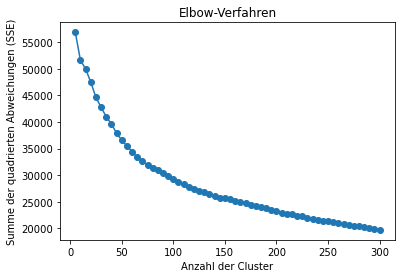

In [38]:
# Liste für die Summe der quadrierten Abweichungen innerhalb der Cluster
sse = []

# Anzahl der maximalen Cluster, die du testen möchtest
max_clusters = 300

# Führe KMeans für verschiedene Anzahlen von Clustern durch und berechne die Summe der quadrierten Abweichungen (SSE)
for num_clusters in range(5, max_clusters+1,5):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto')
    kmeans.fit(features)
    sse.append(kmeans.inertia_)
    
# Plotte die Summe der quadrierten Abweichungen in Abhängigkeit von der Anzahl der Cluster
plt.plot(range(5, max_clusters+1, 5), sse, marker='o')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Summe der quadrierten Abweichungen (SSE)')
plt.title('Elbow-Verfahren')
plt.show()


### Alternativen
Sachen, die ich ausprobiert hab, ob das funktioniert

In [25]:
def build_recommendation_genre(df_artists_tracks, n_clusters=105):
    # Create binarized genres and put it to a DataFrame
    mlb = MultiLabelBinarizer()
    genres_binarized = mlb.fit_transform(df_artists_tracks['genres'])
    genres_df = pd.DataFrame(genres_binarized, columns=mlb.classes_)
   # df_artists_tracks = pd.concat([df_artists_tracks.drop('genres', axis=1), genres_df], axis=1)
    # Define a pipeline for genre features
    genre_pipeline = Pipeline(steps=[
        ('kmeans', KMeans(n_clusters=n_clusters, n_init='auto'))
    ])
    # Fit the data
    genre_labels = genre_pipeline.fit_predict(genres_df)
    df_artists_tracks['genre_cluster'] = genre_labels
    return df_artists_tracks

df_artists_tracks = build_recommendation_genre(df_artists_tracks)

In [18]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Lade den Datensatz
df = df_artists_tracks

# Explode der Genres zu separaten Einträgen
df_exploded = df.explode('genres').reset_index(drop=True)

# Zähle die Häufigkeit der Genre-Namen
genre_counts = df_exploded['genres'].value_counts()

# Wähle die 50 häufigsten Genre-Namen aus
top_genres = genre_counts.head(50).index.tolist()

# Lemmatization der Genre-Namen
lemmatizer = WordNetLemmatizer()
df_exploded['genres_lemmatized'] = df_exploded['genres'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)]))

# Tfidf-Vektorisierung der Genre-Namen für die 50 häufigsten Genres
vectorizer = CountVectorizer(vocabulary=top_genres)
X = vectorizer.fit_transform(df_exploded['genres_lemmatized'])

# PCA zur Dimensionsreduktion
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X.toarray())

# Clustering der reduzierten Daten
kmeans = KMeans(n_clusters=50, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Häufigste Wörter pro Cluster ermitteln
cluster_terms = {}
for cluster_label in range(kmeans.n_clusters):
    cluster_indices = clusters == cluster_label
    cluster_genres = df_exploded.loc[cluster_indices, 'genres']
    cluster_genre_counts = cluster_genres.value_counts()
    top_terms = cluster_genre_counts.head(5).index.tolist()
    cluster_terms[cluster_label] = top_terms

# Genre-Cluster-Namen erstellen
genre_cluster_names = {}
for cluster_label, terms in cluster_terms.items():
    cluster_name = ', '.join(terms)
    genre_cluster_names[cluster_label] = cluster_name

# Ersetze die numerischen Cluster-Labels mit den Genre-Cluster-Namen
df_exploded['genre_cluster'] = clusters
df_exploded['genre_cluster'] = df_exploded['genre_cluster'].map(genre_cluster_names)

# Speichere die Ergebnisse
df_exploded


/Users/merve/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:642: RuntimeWarning:

invalid value encountered in true_divide

/Users/merve/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/merve/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning:

Number of distinct clusters (1) found smaller than n_clusters (50). Possibly due to duplicate points in X.



,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,...,artists_id,artists_name,album_id,uri,preview_url,country,lyrics,metric_cluster,genre_cluster,genres_lemmatized
0,0.29400,0.698,235584.0,0.606,0.000003,10.0,0.1510,-7.447,0.0,28.0,...,3mxJuHRn2ZWD5OofvJtDZY,Jesse Markin,0D3QufeCudpQANOR7luqdr,spotify:track:5qljLQuKnNJf4F4vfxQB0V,https://p.scdn.co/mp3-preview/1b05a902da3a251d...,BE,\r\n\r\nPerhaps I am bound to be restless\r\nA...,0,"[], ['hoerspiel'], ['guidance'], ['focus'], ['...",[ 'finnish indie ' ]
1,0.16600,0.543,233998.0,0.612,0.000000,9.0,0.1290,-7.685,0.0,37.0,...,3mxJuHRn2ZWD5OofvJtDZY,Jesse Markin,3wIjGVauUxR4c3NvnQZ0Jo,spotify:track:3THTkAwJOsmxgizvYkBNRI,https://p.scdn.co/mp3-preview/8af517b8202114d6...,AR,\r\n\r\nMuch better in my day\r\nMuch better i...,0,"[], ['hoerspiel'], ['guidance'], ['focus'], ['...",[ 'finnish indie ' ]
2,0.86300,0.719,656960.0,0.308,0.000000,6.0,0.2530,-10.340,1.0,31.0,...,4xWMewm6CYMstu0sPgd9jJ,Favorite Kids Stories,1bcqsH5UyTBzmh9YizdsBE,spotify:track:3VAX2MJdmdqARLSU5hPMpm,https://p.scdn.co/mp3-preview/d8140736a6131cb5...,BE,\r\nYour Gods and my Gods-do you or I know whi...,-1,"[], ['hoerspiel'], ['guidance'], ['focus'], ['...",[ ]
3,0.82400,0.688,29240.0,0.304,0.000000,10.0,0.1420,-9.960,1.0,0.0,...,4xWMewm6CYMstu0sPgd9jJ,Favorite Kids Stories,51g5viCaYjOW5XO4qX1RCD,spotify:track:1WJzRtI1ABzV3TPIeJZVvi,https://p.scdn.co/mp3-preview/54031f6d3ab4784a...,BE,\r\nYour Gods and my Gods-do you or I know whi...,-1,"[], ['hoerspiel'], ['guidance'], ['focus'], ['...",[ ]
4,0.85000,0.632,497493.0,0.372,0.000000,7.0,0.1100,-8.760,1.0,30.0,...,4xWMewm6CYMstu0sPgd9jJ,Favorite Kids Stories,7EtGJVYZbb2Krgwizn2flB,spotify:track:65MopnhsXOgYw4RuiA2pGU,https://p.scdn.co/mp3-preview/32c98e55e89da792...,BE,\r\nYour Gods and my Gods-do you or I know whi...,1,"[], ['hoerspiel'], ['guidance'], ['focus'], ['...",[ ]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77840,0.01850,0.785,176773.0,0.935,0.023000,0.0,0.3860,-7.298,1.0,37.0,...,48YkQQTWzmT248VY8DF7Fv,Profetas y Freneticos,12jnuDISC9Ye27rCAdf0Fk,spotify:track:29WK73lMQpLELfHd6PfbjY,https://p.scdn.co/mp3-preview/f0032d0e3e456dcc...,AR,\r\nQuisiera empezar\r\nVolver a cruzar despac...,1,"[], ['hoerspiel'], ['guidance'], ['focus'], ['...",[ 'chilean rock ' ]
77841,0.25200,0.735,148792.0,0.785,0.000041,6.0,0.3280,-5.065,1.0,29.0,...,5egzRmwGZxr5zT8Dzy5Ml9,IVYxM,1xOBg2LRRKb2csNNMEKkcT,spotify:track:1gzlbsR5d9adR5dDuRMZiX,https://p.scdn.co/mp3-preview/91c217b2f7bc6920...,AR,"\r\n\r\nI'm a girl’s girl, I'm a boss in a man...",1,"[], ['hoerspiel'], ['guidance'], ['focus'], ['...",[ 'scandinavian r & b ' ]
77842,0.03550,0.782,220878.0,0.665,0.000180,11.0,0.3670,-6.682,0.0,7.0,...,6viUqm7m1tI9x3EIo0dTLR,CYBER,3jKce9NvEDsYPGOqMsWzko,spotify:track:4L820y58kEWkXldgfjCDbg,https://p.scdn.co/mp3-preview/918a32baa3a0fb08...,AR,"\r\n\r\nShe want, I want, we want it, yeah, ye...",0,"[], ['hoerspiel'], ['guidance'], ['focus'], ['...",[ 'icelandic hip hop ' ]
77843,0.10000,0.587,202907.0,0.786,0.000032,10.0,0.0808,-6.553,0.0,53.0,...,3yW6jTzGjHUUkLvLkjLOVn,Eskimo Joe,3qUUxffTYleIODTFlc2CXh,spotify:track:1GR1U3xkN1gf8dzvcyGxfa,https://p.scdn.co/mp3-preview/fe5686b36f1e0c24...,AR,\r\nOoh I'm so spaced out today\r\nOoh I could...,0,"[], ['hoerspiel'], ['guidance'], ['focus'], ['...","[ 'australian alternative rock ' , 'australian..."


## Build Metric recommondation

In [42]:
METRIC_FEATURES = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 
                   'loudness', 'mode', 'popularity', 'speechiness', 'tempo', 'time_signature', 'valence', 
                   'artist_popularity', 'followers']

### Build K-NN

In [12]:
def recommend_songs_knnOnly(song_id, n_recommendations):
    metric_features = METRIC_FEATURES
    knn = NearestNeighbors(n_neighbors=n_recommendations)  # Change n_neighbors based on your needs
    knn.fit(df_artists_tracks[metric_features])
    df = df_artists_tracks
    song_features = df[df['tracks_id'] == song_id][metric_features]
    
    distances, indices = knn.kneighbors(song_features)
    
    song_list = []
    for i in range(len(distances.flatten())):
        if i == 0:
            print(f'Recommendations for {song_id}:\n')
        else:
            song_list.append(df.iloc[indices.flatten()[i]]['tracks_id'])
            print(f'{i}: {df.iloc[indices.flatten()[i]]["tracks_id"]}, with distance of {distances.flatten()[i]}')

    return song_list


In [13]:
df = recommend_songs_knnOnly('5qljLQuKnNJf4F4vfxQB0V', 10)
df

Recommendations for 5qljLQuKnNJf4F4vfxQB0V:

1: 3cPdD7SWz3wGZ5xENiuoFK, with distance of 55.322488725554116
2: 6vnSPnsRNJAjMxCoe1HyR4, with distance of 75.35920101859905
3: 4lucCq75lCBqcDvCvNHX3X, with distance of 99.39718103997642
4: 19CVyKUj6sc0O7DL8YNLJH, with distance of 171.89889788582227
5: 48MD8OcaGsbRpPNrWOJPFK, with distance of 177.1893989905266
6: 6FugyKqhP4hZKofxRHoOV1, with distance of 179.1566642039149
7: 6WgmGxSHdto6AG1qRUSMrt, with distance of 180.27860336754696
8: 7zqGeByPHWYqdmzQtJShWW, with distance of 181.78089088167076
9: 1RHTGr4X3c6eiTjvf1iz7B, with distance of 190.09695827693452


['3cPdD7SWz3wGZ5xENiuoFK',
 '6vnSPnsRNJAjMxCoe1HyR4',
 '4lucCq75lCBqcDvCvNHX3X',
 '19CVyKUj6sc0O7DL8YNLJH',
 '48MD8OcaGsbRpPNrWOJPFK',
 '6FugyKqhP4hZKofxRHoOV1',
 '6WgmGxSHdto6AG1qRUSMrt',
 '7zqGeByPHWYqdmzQtJShWW',
 '1RHTGr4X3c6eiTjvf1iz7B']

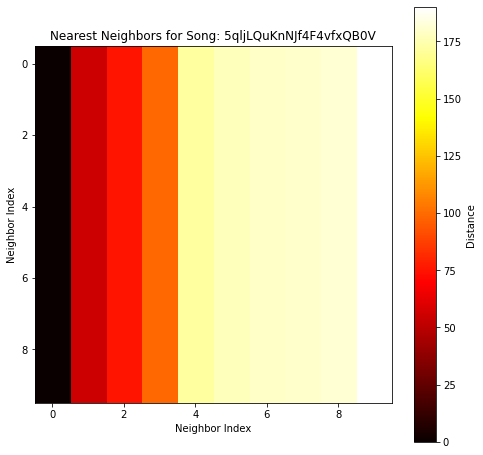

In [63]:
# Trainingsdaten für den Algorithmus
train_features = df_artists_tracks[metric_features]

# Initialisiere und trainiere den Algorithmus
knn = NearestNeighbors(n_neighbors=10)
knn.fit(train_features)

# Beispiel-Song für die Empfehlungen
test_song_id = "5qljLQuKnNJf4F4vfxQB0V"
song_features = df_artists_tracks[df_artists_tracks['tracks_id'] == test_song_id][metric_features]

# Finde die ähnlichsten Nachbarn
distances, indices = knn.kneighbors(song_features)

# Erstelle die Distanzmatrix
dist_matrix = np.zeros((len(distances.flatten()), len(distances.flatten())))
for i in range(len(distances.flatten())):
    for j in range(len(distances.flatten())):
        dist_matrix[i, j] = distances.flatten()[j]

# Plot der Distanzmatrix als Heatmap
plt.figure(figsize=(8, 8))
plt.imshow(dist_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(label='Distance')
plt.title(f'Nearest Neighbors for Song: {test_song_id}')
plt.xlabel('Neighbor Index')
plt.ylabel('Neighbor Index')
plt.show()

### Build DBScan

In [23]:
#TODO: funktioniert nicht - rennt Ewigkeiten - sollte zur optimalen Hyperparameter testen verwendet werden

# split df_artists_tracks into train and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

train, test = train_test_split(df_artists_tracks, test_size=0.7, random_state=42)

from sklearn.model_selection import ParameterGrid

def evaluate_dbscan(df, metric_features, eps, min_samples):
    dbscan = Pipeline(steps=[
        ('scaler', MinMaxScaler()),
        ('dbscan', DBSCAN(eps=eps, min_samples=min_samples))
    ])
    #dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(df[metric_features])
    n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    print(f"Anzahl der Cluster: {n_clusters_}")
    silhouette_avg = silhouette_score(df[metric_features], cluster_labels)
    return silhouette_avg

from sklearn.model_selection import ParameterGrid

# Definiere die Hyperparameter-Kombinationen für die Rastersuche
param_grid = {'eps': [0.3, 0.5], 'min_samples': [5, 7, 9, 11]}

best_score = -1
best_params = {}
metric_features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 
                   'loudness', 'mode', 'popularity', 'speechiness', 'tempo', 'time_signature', 'valence', 'genre_cluster']

# Durchlaufe alle Hyperparameter-Kombinationen
for params in ParameterGrid(param_grid):
    eps = params['eps']
    min_samples = params['min_samples']
    
    # Evaluiere das DBSCAN-Modell mit den aktuellen Hyperparametern
    score = evaluate_dbscan(train, metric_features, eps, min_samples)
    
    print(eps, min_samples, score)
    # Aktualisiere den besten Score und die besten Parameter, falls nötig
    if (score > 0 and score > best_score) or (score < 0 and score < best_score):
        best_score = score
        best_params = params

# Gib die besten Hyperparameter aus
print(f"Beste Hyperparameter: {best_params}")
print(f"Beste Silhouetten-Score: {best_score}")


Anzahl der Cluster: 70
0.3 5 -0.6618196721623454
Anzahl der Cluster: 38
0.3 7 -0.5205484265554227
Anzahl der Cluster: 30
0.3 9 -0.5367725226104346
Anzahl der Cluster: 25
0.3 11 -0.5604705373281665
Anzahl der Cluster: 5
0.5 5 -0.08305982076286873
Anzahl der Cluster: 5
0.5 7 -0.08710211010461193
Anzahl der Cluster: 3
0.5 9 -0.05438291882397975
Anzahl der Cluster: 3
0.5 11 -0.057338809806693834
Beste Hyperparameter: {}
Beste Silhouetten-Score: -1


In [18]:
METRIC_FEATURES = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 
                   'loudness', 'mode', 'popularity', 'speechiness', 'tempo', 'time_signature', 'valence', 
                   'artist_popularity', 'followers', 'genre_cluster']

In [44]:
def build_recommendation_metric(df_artists_tracks):
    metric_pipeline = Pipeline(steps=[
        ('scaler', MinMaxScaler()),
        ('dbscan', DBSCAN(eps=0.5, min_samples=7))
    ])
    # Fit and transform the data
    df_artists_tracks['metric_cluster'] = metric_pipeline.fit_predict(df_artists_tracks[METRIC_FEATURES])
    return df_artists_tracks

df_artists_tracks = build_recommendation_metric(df_artists_tracks)

In [22]:
#show the cluster metrics_cluster unique values
df_artists_tracks['metric_cluster'].value_counts()

 3     31982
-1     24956
 0     15976
 12     1341
 5       750
       ...  
 65        4
 63        4
 62        4
 84        4
 83        3
Name: metric_cluster, Length: 100, dtype: int64

In [6]:
#show the cluster metrics_cluster unique values
df_artists_tracks['metric_cluster'].value_counts()

 1     42871
 0     22209
-1     11103
 3       634
 4       161
       ...  
 47        3
 86        3
 75        3
 46        2
 87        2
Name: metric_cluster, Length: 90, dtype: int64

In [16]:
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.discriminant_analysis import StandardScaler 
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_artists_tracks, test_size=0.7, random_state=42)


pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(train[METRIC_FEATURES])
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = train['tracks_name']
projection['cluster'] = train['metric_cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()

## Modelle Kombinieren mit Nearest Neighbor

### Verwendetes Modell

In [11]:
from sklearn.preprocessing import StandardScaler

def recommend_songs_knn(df, song_id, n_recommendations, priority_factor=1):
    additional_features = ['genre_cluster', 'metric_cluster']
    metric_features = METRIC_FEATURES + additional_features
# filter the dataframe on the genre_cluster of the song_id
    #df_scaled = df[df['genre_cluster'] == df[df['tracks_id'] == song_id]['genre_cluster'].values[0]].copy()
    #other
    df_scaled = df.copy()
    df_scaled[additional_features] *= priority_factor
    print(df_scaled.info())
    #df_scaled = df.copy()
    #df_scaled[additional_features] *= priority_factor

    # Fit the NearestNeighbors model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Normalize the data
        ('knn', NearestNeighbors(n_neighbors=n_recommendations, metric='cosine', algorithm='brute'))
    ])

    # Fit the pipeline on the scaled data
    pipeline.fit(df_scaled[metric_features])

    #knn = NearestNeighbors(n_neighbors=n_recommendations, metric='cosine')
    #knn.fit(df_scaled[metric_features])

    # Get the features of the song_id and normalize
    song_features = df_scaled[df_scaled['tracks_id'] == song_id][metric_features]
    song_features_scaled = pipeline.named_steps['scaler'].transform(song_features)

    distances, indices = pipeline.named_steps['knn'].kneighbors(song_features_scaled)
    print(indices.flatten())

    song_list = [df_scaled.iloc[indices.flatten()[i]]['tracks_id'] 
    for i in range(1, len(distances.flatten()))
        if print(f'{i}: {df.iloc[indices.flatten()[i]]["tracks_id"]}, with distance of {distances.flatten()[i]}') is None]
    return df[df['tracks_id'].isin(song_list)]


recommend_songs_knn(df_artists_tracks, '0H1ZwL3aYhe8JHrZC0zrcI', 10, 5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77845 entries, 0 to 77844
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   acousticness       77845 non-null  float64
 1   danceability       77845 non-null  float64
 2   duration_ms        77845 non-null  float64
 3   energy             77845 non-null  float64
 4   instrumentalness   77845 non-null  float64
 5   key                77845 non-null  float64
 6   liveness           77845 non-null  float64
 7   loudness           77845 non-null  float64
 8   mode               77845 non-null  float64
 9   popularity         77845 non-null  float64
 10  speechiness        77845 non-null  float64
 11  tempo              77845 non-null  float64
 12  time_signature     77845 non-null  float64
 13  valence            77845 non-null  float64
 14  artist_popularity  77845 non-null  int64  
 15  followers          77845 non-null  int64  
 16  genres             778

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence,artist_popularity,followers,genres,tracks_id,tracks_name,artists_id,artists_name,album_id,uri,preview_url,country,lyrics,metric_cluster,genres_new,genre_cluster
3966,0.627,0.666,3271162.0,0.4440,0.000000,7.0,0.1950,-18.794,0.0,20.0,0.941,75.937,4.0,0.496,19,307,['poetry'],1tbtlLPgAY0oMdKSiOUVrK,The Color Out of Space,7M1yWBfWH7ssn0t018BLvC,Richard Mitchley,7EbZePlC1PXEHRzcSLRNJH,spotify:track:1tbtlLPgAY0oMdKSiOUVrK,https://p.scdn.co/mp3-preview/0dc8803ce2582af6...,AR,"\r\n\r\nYo, Yo-Yo is in the house\r\nRepresent...",0,poetry,40.0
16830,0.694,0.665,4462995.0,0.0822,0.000000,11.0,0.1140,-18.465,0.0,8.0,0.943,87.280,4.0,0.217,53,4834,['reading'],4GqA2aJKpyEzIoUSNeQZYE,The Adventure of the Copper Beeches,3Xj8xqJUruJ2moKunjaf0d,Sir Arthur Conan Doyle,2toU8szjaGP4b2mI61FiKJ,spotify:track:4GqA2aJKpyEzIoUSNeQZYE,https://p.scdn.co/mp3-preview/e01344c60c6caa1a...,FI,\r\nMr. Sherlock Holmes was always of opinion ...,-1,reading,54.0
16831,0.774,0.697,4057967.0,0.1470,0.000000,5.0,0.1410,-19.827,0.0,16.0,0.949,102.489,4.0,0.307,53,4834,['reading'],0lFJxKAEaXSzRErN9Fmsej,The Red-Headed League,3Xj8xqJUruJ2moKunjaf0d,Sir Arthur Conan Doyle,2toU8szjaGP4b2mI61FiKJ,spotify:track:0lFJxKAEaXSzRErN9Fmsej,https://p.scdn.co/mp3-preview/33c04d9826467680...,FI,"\r\nI had called upon my friend, Mr. Sherlock ...",0,reading,54.0
16834,0.637,0.684,4437892.0,0.0694,0.000000,11.0,0.0998,-21.224,0.0,8.0,0.951,82.189,4.0,0.241,53,4834,['reading'],5Dy7TrNunm12mDOijmmCrg,The Adventure of the Beryl Coronet,3Xj8xqJUruJ2moKunjaf0d,Sir Arthur Conan Doyle,2toU8szjaGP4b2mI61FiKJ,spotify:track:5Dy7TrNunm12mDOijmmCrg,https://p.scdn.co/mp3-preview/73411d8e666113b8...,FI,\r\nI.\r\nTo Sherlock Holmes she is always the...,-1,reading,54.0
16835,0.623,0.633,4298999.0,0.0961,0.000000,11.0,0.0975,-20.374,0.0,11.0,0.952,81.361,4.0,0.222,53,4834,['reading'],0HBrGPG4TXcTRSIeDDEGRW,The Man with the Twisted Lip,3Xj8xqJUruJ2moKunjaf0d,Sir Arthur Conan Doyle,2toU8szjaGP4b2mI61FiKJ,spotify:track:0HBrGPG4TXcTRSIeDDEGRW,https://p.scdn.co/mp3-preview/13887b94afd45e09...,FI,"\r\nIsa Whitney, brother of the late Elias Whi...",-1,reading,54.0
16836,0.602,0.690,3776132.0,0.0976,0.000000,5.0,0.1190,-19.883,0.0,9.0,0.950,80.674,4.0,0.199,53,4834,['reading'],73Sci75kuIkVahliDZyqrH,The Adventure of the Blue Carbuncle,3Xj8xqJUruJ2moKunjaf0d,Sir Arthur Conan Doyle,2toU8szjaGP4b2mI61FiKJ,spotify:track:73Sci75kuIkVahliDZyqrH,https://p.scdn.co/mp3-preview/ebc1910450521aba...,FI,\r\nI had called upon my friend Sherlock Holme...,0,reading,54.0
53747,0.907,0.631,4667397.0,0.2200,0.000000,0.0,0.1800,-25.128,0.0,5.0,0.929,84.094,4.0,0.325,2,38,[],7A2aaIUvfMfbH9fiCQCHQD,The Letters & Journals Of Lord Nelson - Part 1,5UBRrIpnjl7mpAG3bl6ru4,Charles Dance,4LD5lgr4SqyIMnzG6gby6G,spotify:track:7A2aaIUvfMfbH9fiCQCHQD,https://p.scdn.co/mp3-preview/ddd0cf1492f25c54...,AR,\r\n\r\nClimb on board\r\nWe'll go slow and hi...,-1,,-1.0
67605,0.863,0.655,3386480.0,0.2330,0.000017,10.0,0.0981,-15.828,0.0,6.0,0.920,81.728,4.0,0.400,8,181,['drama'],3AoLoamKawLJniYHkncKDM,The Red and the Black,2XH968CwqNZK2Dkm5EEFuh,Nbc Theater,100ldb0h5WLSPaxFLbkuCa,spotify:track:3AoLoamKawLJniYHkncKDM,https://p.scdn.co/mp3-preview/755c234206b4ebcb...,AR,\r\n�Sabes amor? Yo nunca te he olvidado\r\nTe...,0,drama,59.0
70431,0.857,0.508,4811520.0,0.2600,0.000000,10.0,0.3880,-28.413,0.0,12.0,0.847,71.382,3.0,0.356,31,7330,['motivation'],6uaVbs4mkZE8TiHZR2Xd46,Introductory Lecture to Buddhism,2E7VnsrQ0mPnFoLz2q7nmd,Dalai Lama,1LUebW7FyzuFrK8Yj1ao2k,spotify:track:6uaVbs4mkZE8TiHZR2Xd46,https://p.scdn.co/mp3-preview/3849da612695d9e8...,AR,"\r\n\r\nSo, when the music's stoppin'\r\nThere...",-1,motivation,75.0


In [49]:
import ast
genre = 'pop'
import re


df_artists_tracks2 = df_artists_tracks.copy()
#replace [] with Unknown
#df_artists_tracks2['genres'] = df_artists_tracks['genres'].apply(lambda x: ["['Unknown']"] if x == '[]' else x)

#explode the genre column and then search for the genre in the exploded column
# Clean genre options
unique_genres = df_artists_tracks['genres'].apply(ast.literal_eval).explode().unique()

cleaned_genres = []
for genre in unique_genres:
    if not genre:  # Check if genre is empty
        genre = 'Unknown'
    elif isinstance(genre, list):  # Check if genre is a list
        genre = ', '.join(genre)  # Convert list to string
    cleaned_genres.append(genre)

# Remove duplicates
cleaned_genres = list(set(cleaned_genres))


# Remove duplicates
cleaned_genres = list(set(cleaned_genres))
cleaned_genres



[nan,
 'welsh indie',
 'limerick indie',
 'funk metal',
 'jazz electric bass',
 'mambo',
 'canterbury scene',
 'liquid funk',
 'prog quebec',
 'ambient',
 'deep rai',
 'irish indie',
 'melodipop',
 'australian blues',
 'persian pop',
 'icelandic electronic',
 'spanish new wave',
 'danish pop rock',
 'spacewave',
 'classic schlager',
 'zillertal',
 'galego',
 'flamenco guitar',
 'red dirt',
 'steel guitar',
 'southern rock',
 'indie emo',
 'southern gospel',
 'russian electronic',
 'stomp and holler',
 'canadian experimental',
 'kids dance party',
 'alternative pop rock',
 'indonesian hip hop',
 'south african hip hop',
 'springfield mo indie',
 'traditional scottish folk',
 'reggae mexicano',
 'mexican hip hop',
 'ugandan pop',
 'indian pop',
 'indie quebecois',
 'sami',
 'nu skool breaks',
 'deep progressive trance',
 'tracestep',
 'deep delta blues',
 'colombian black metal',
 'baltimore hip hop',
 're:techno',
 'nwobhm',
 'latin american heavy psych',
 'anime rock',
 'spanish pop ro

In [52]:
selected_genre = 'pop catracho'
filtered_df = df_artists_tracks[df_artists_tracks['genres'].apply(lambda x: selected_genre in ast.literal_eval(x))]
filtered_df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence,artist_popularity,followers,genres,tracks_id,tracks_name,artists_id,artists_name,album_id,uri,preview_url,country,lyrics,genres_new,genre_cluster,metric_cluster
25299,0.1800,0.631,253973.0,0.671,0.001640,8.0,0.0991,-8.103,0.0,47.0,0.0444,111.022,4.0,0.434,75,1563420,"['latin', 'latin hip hop', 'pop catracho', 're...",4k7vPnImaZZZv95BvkjbfO,Beba,1jSjfSgDjedJdi5MoyRu78,Lary Over,2n8xgMLl3r8CHf3pt1aBF6,spotify:track:4k7vPnImaZZZv95BvkjbfO,https://p.scdn.co/mp3-preview/1a599b4362bbafa5...,FI,"\r\nLetra de ""Beba""\r\nYeh-eh-eh\r\nYeh-eh-eh\...",latin latin hip-hop pop catracho reggaeton flo...,97.0,0
49513,0.0587,0.902,171688.0,0.775,0.000000,1.0,0.0670,-2.901,1.0,29.0,0.2510,129.997,4.0,0.456,53,4725,['pop catracho'],4uHMyn97iLisW52blEVxSA,Brazil de Jangueo,2vC9dN2ebF9lBbAFlIUeL4,El Chevo,4kbGKRwfxcsLFtpXWYk4jt,spotify:track:4uHMyn97iLisW52blEVxSA,https://p.scdn.co/mp3-preview/4d6d3c39ec4d93c5...,AR,"\r\n\r\n\r\nObrigado, llegando Brasil\r\nBrazi...",pop catracho,102.0,1
58336,0.0385,0.622,358873.0,0.201,0.000016,0.0,0.0869,-12.803,0.0,30.0,0.0469,150.024,3.0,0.251,25,1330,"['pop catracho', 'rock catracho']",4J8Wv0MpH273EeYkZmGHNh,Somos el Universo,6wYLnYlUqxUOZ4IVTPsOMm,Chia Casanova,76sg8U3AdVSRveC37ZjFTA,spotify:track:4J8Wv0MpH273EeYkZmGHNh,https://p.scdn.co/mp3-preview/c10d37696f9ba5cd...,FI,\r\n\r\n\r\nQue el odio se muera de hambre\r\n...,pop catracho rock catracho,102.0,0
68146,0.2420,0.950,288366.0,0.749,0.000012,3.0,0.1380,-9.151,1.0,45.0,0.0690,124.319,4.0,0.957,45,13417,"['pop catracho', 'punta']",3ralpk3PMxEPoFKO0hiJMv,Sopa de Caracol,1Ykx49KpY0FqIXUwyuD3TJ,Banda Blanca,01naNJTQzXeef1d5oYd7AQ,spotify:track:3ralpk3PMxEPoFKO0hiJMv,https://p.scdn.co/mp3-preview/e6ac3f602be8918d...,AR,\r\nYeppa\r\nWhatta negui cónsul\r\nYupi pa' t...,pop catracho punta,102.0,1


In [53]:
#give number of rows
filtered_df.shape[0]

4